<a href="https://colab.research.google.com/github/joselvira/BiomecanicaPython/blob/master/Notebooks/Como_configurar_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cómo configurar las gráficas

En investigación, continuamente necesitamos crear gráficas. Esto normalmente se puede realizar con relativa facilidad en Excel o cualquier otra hoja de cálculo, según el tipo de gráfico que necesitemos. Sin embargo, hacerlo con hojas de cálculo puede tener varios problemas. Uno, que si tenemos que repetir el mismo gráfico varias veces con el mismo tipo de datos se hace muy farragoso y poco práctico. Y otro problema es que cuando necesitamos un gráfico para incluir en un artículo y la revista nos exige una calidad concreta de definición en la imagen (pixels por pulgada o dots per inch, dpi), la hoja de cálculo no suele dejar modificarlo.
Con Python podemos solucionar todos esos problemas.

En primer lugar se cargan las librerías básicas que vamos a utilizar.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #librería básica para hacer gráficas

import seaborn as sns #librería que mejora matplotlib para automatizar gráficos más complejos
sns.set_style("white" and 'ticks') #con esto se ajustan aspectos básicos de la configuración de las gráficas 


Como ejemplo, se crean unos datos sencillos basados en una onda sinusoidal y se presentan directamente, de momento sin preocuparnos por su aspecto.
Fíjate que en este ejemplo, se representa en el eje vertical la variable que le pedimos, mientras que en el eje horizontal indica el índice de cada valor, es decir su orden dentro de la variable.

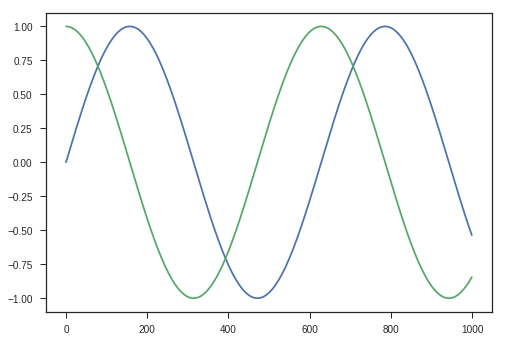

In [0]:
x = np.arange(0,10, 0.01) #para simular una variable de tiempo, crea una secuencia de datos entre 0 y 10 con intervalo entre datos de 0.01
y = np.sin(x) #calcula el seno correspondiente a los valores de la variable de tiempo
y2= np.cos(x)

#Formato rápido
plt.plot(y) #gráfica del seno
plt.plot(y2) #gráfica del coseno
plt.show()

Para que dibuje varias líneas en la misma figura, las ponemos todas seguidas y cuando hayamos terminado, se cierra la figura con plt.show(). De esta manera, si se incluyen otras instrucciones de dibujar gráficas las incluirá en otra figura distinta.
Por ejemplo, si separamos cada instrucción de gráfica con plt.show() representa en la figura las líneas que se hayan indicado hasta ese momento.


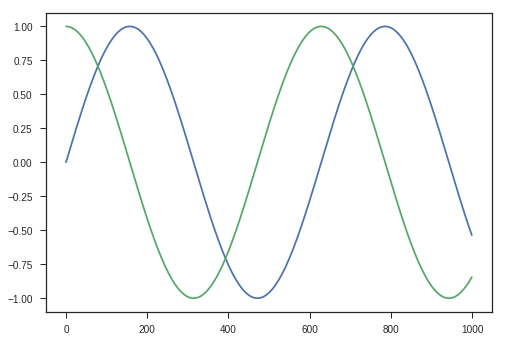

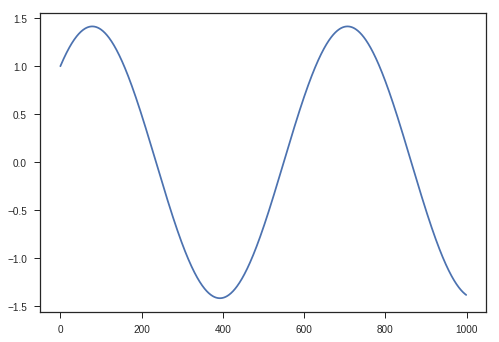

In [0]:
plt.plot(y) #gráfica del seno
plt.plot(y2) #gráfica del coseno
plt.show()
plt.plot(y+y2) #gráfica del seno + coseno
plt.show()

En este mismo ejemplo, nos puede interesar representar en el eje x el tiempo, que hemos metido en la variable x.

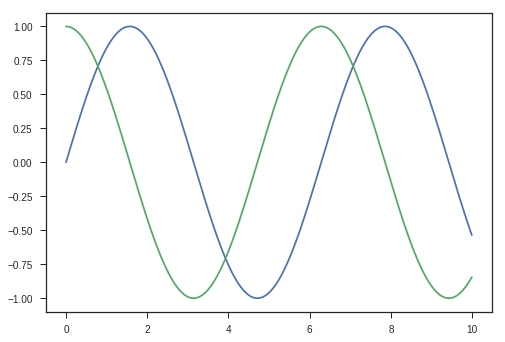

In [0]:
plt.plot(x, y) #gráfica del seno
plt.plot(x, y2) #gráfica del coseno
plt.show()

Ahora el eje x representa cómo evoluciona el tiempo en segundos.
Esta gráfica podría ser suficiente para explorar rápidamente los datos, pero podemos configurar todas sus características al detalle, y es lo que haremos a continuación.

## Ajustar el formato de las gráficas

Podemos cambiar las características de las líneas, poner título al gráfico y a los ejes.

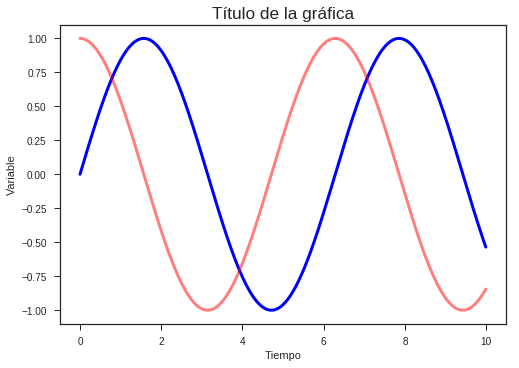

In [0]:
#%% Con control de las partes del gráfico
fig, ax = plt.subplots()
plt.plot(x, y, color='blue', linewidth=3) #linewidth o lw
plt.plot(x, y2, color='red', linewidth=3, alpha=0.5) #alpha controla la transparencia: 1= opaco; 0= transparente
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Título de la gráfica', fontsize='x-large') #se puede controlar el tamaño de cualquier texto, con nombre cualitativos ('smaller', 'small, 'large', 'x-large', etc.) o con el tamaño en de letra en valor numérico exacto
plt.show()

Más controles de elmentos específicos del gráfico

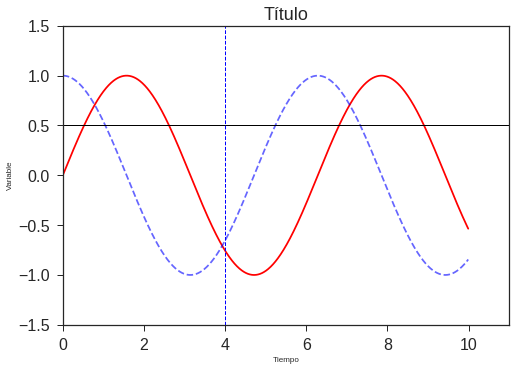

In [0]:
fig, ax = plt.subplots()
plt.plot(x, y, 'r-') #se puede indicar simultáneamente el color y el estilo. '-' es línea contínua; '--' línea discontinua, etc.
plt.plot(x, y2, 'b--', alpha=0.6) #con alpha se controla la transparencia de la línea

ax.axhline(y=0.5, lw=1, color='k') #introduce una línea horizontal
ax.axvline(x=4.0, lw=1, color='b', linestyle='--') #introduce una línea horizontal

ax.set_xlabel('Tiempo', fontsize=8)
ax.set_ylabel('Variable', fontsize=8)
ax.set_title('Título', fontsize=18)
ax.set_xlim((0, 11)) #acota el tamaño del eje x
ax.set_ylim((-1.5, 1.5)) #acota el tamaño del eje y
ax.tick_params(axis='both', which='major', labelsize=16) #ajusta el tamaño de letra de las etiquetas de los ejes. axis puede ser 'both', 'x' o 'y', y wich puede ser 'major' o 'minor'
plt.show()


###Modificar el tamaño de la figura.

También se puede controlar el tamaño de la figura al iniciarla. Con ***figsize*** se indica el tamaño en pulgadas (en matoplotlib se utilizan pulgadas, para pasarlo a centímetros se multiplican por 2.54).

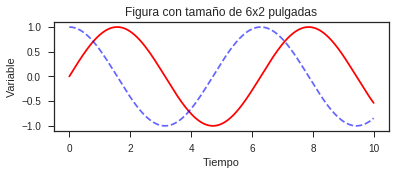

In [0]:
fig, ax = plt.subplots(figsize=(6,2)) #crea una figura de 6x2 pulgadas
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Figura con tamaño de 6x2 pulgadas')
plt.show()



En cambio con el parámetro ***dpi*** se indica los puntos por pulgada. Por defecto dpi es 100, pero se puede ajustar como se quiera. En la siguiente figura se representa al doble de dpi que la anterior, por eso se ve el doble de grande.

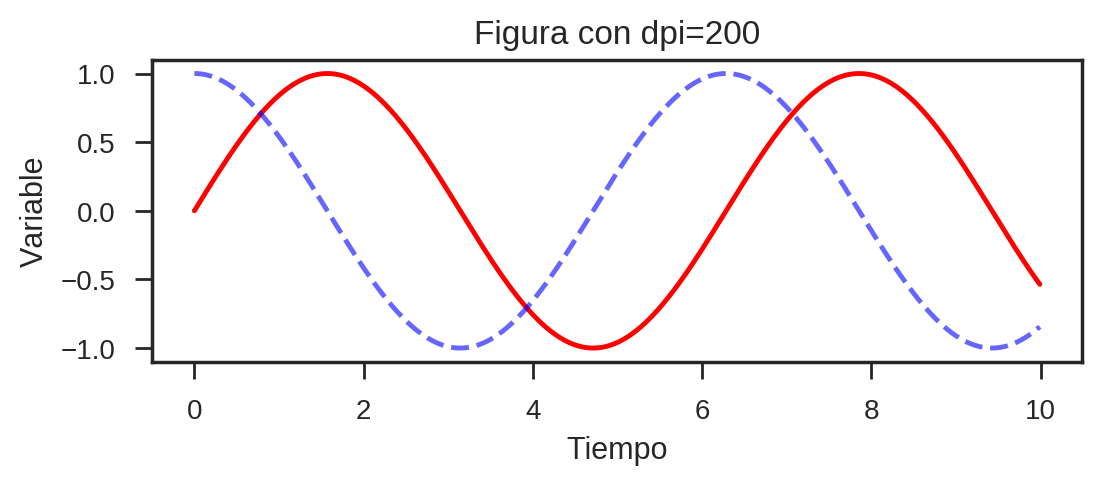

In [0]:
fig, ax = plt.subplots(figsize=(6,2), dpi=200)
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Figura con dpi=200')
plt.show()

Fíjate en que al cambiar el parámetro dpi, también cambian los elementos del gráfico proporcionalmente. Esto es porque en matplotlib el tamaño de los elementos se define por puntos. Por ejemplo, una letra con tamaño 12 quiere decir que tiene un tamaño de 12 puntos de alto. Con un dpi de 100 serían 12/100 = 0.12 pulgadas de alto, pero con un dpi de 200 serían 12/200 = 0.06 pulgadas de alto. Lo mismo pasa con las líneas, una línea de 1 punto de grosor, con el doble de dpi será el doble de gruesa en dimensiones reales, pero mantiene la misma proporción con el resto del gráfico.
Si por ejemplo quisiéramos agrandar la imagen cambiando figsize, el tamaño sería el pismo pero se perdería la proporción de los elementos, y se verían más pequeños. En el en el siguiente ejemplo se crea la misma figura anterior, pero con la mitad de dpi y el doble en figsize.


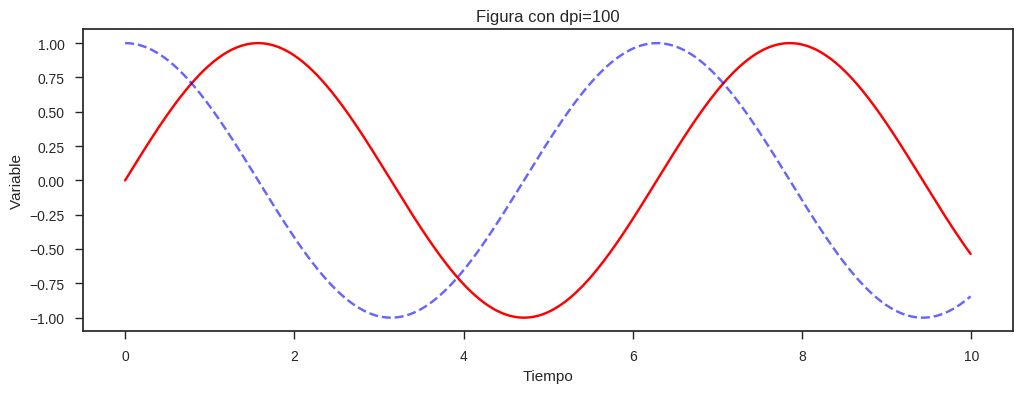

In [0]:
fig, ax = plt.subplots(figsize=(12,4), dpi=100)
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Figura con dpi=100')
plt.show()

El tamaño resultante en píxeles en cualquier imangen digital siempre depende de la combinación de estos dos parámetros: el tamaño real de la imagen y los puntos por pulgada.
Si por ejemplo se quiere hacer una imagen con tamaño 600 x 400 píxeles, se puede hacer con distintas combinaciones de figsize y dpi:

figsize=(12, 8), dpi= 50

figsize=(6, 4)  , dpi=100

figsize=(4, 2.67)  , dpi=150

figsize=( 3, 2)  , dpi=200

Como se puede apreciar en las figuras de abajo, el tamaño total del cuadro de los ejes se mantiene, pero el aspecto de las partes de la figura, texto, números y líneas, cambia.

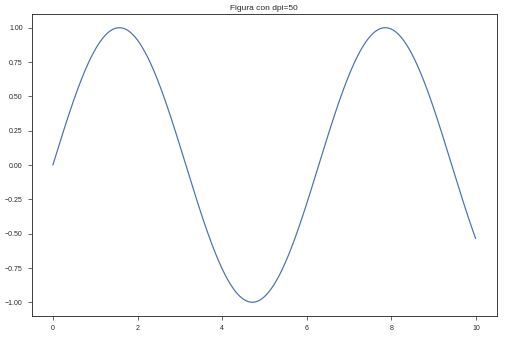

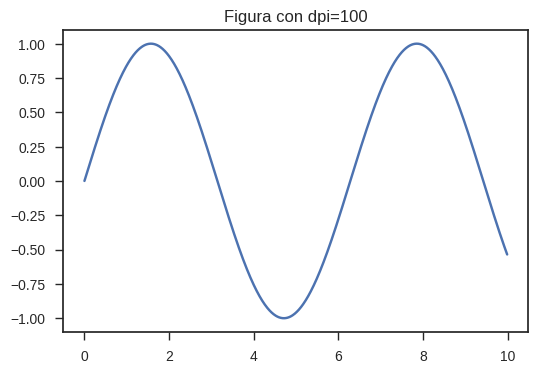

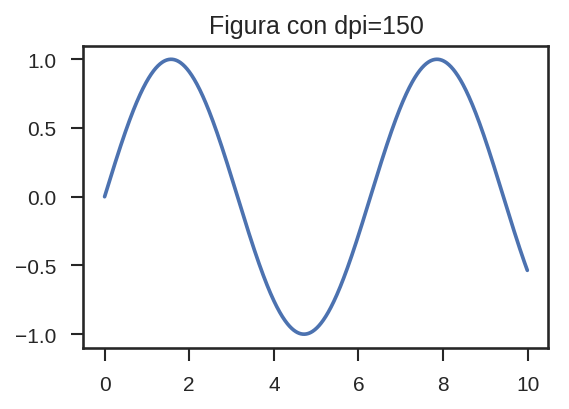

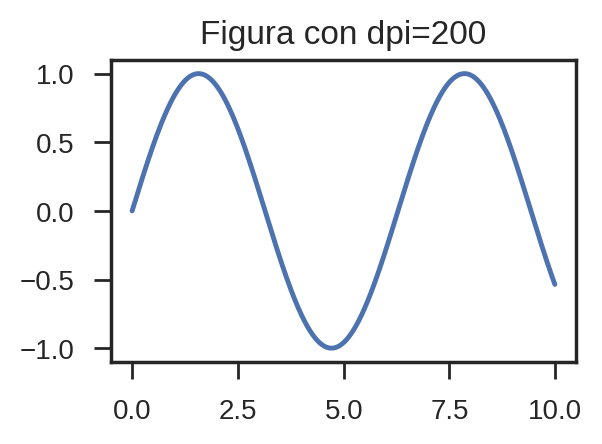

In [0]:
x = np.arange(0,10, 0.01) #para simular una variable de tiempo, crea una secuencia de datos entre 0 y 10 con intervalo entre datos de 0.01
y = np.sin(x)

fig, ax = plt.subplots(figsize=(12,8), dpi=50)
plt.plot(x, y)
ax.set_title('Figura con dpi=50')
plt.show()

fig, ax = plt.subplots(figsize=(6,4), dpi=100)
plt.plot(x, y)
ax.set_title('Figura con dpi=100')
plt.show()

fig, ax = plt.subplots(figsize=(4,2.67), dpi=150)
plt.plot(x, y)
ax.set_title('Figura con dpi=150')
plt.show()

fig, ax = plt.subplots(figsize=(3,2), dpi=200)
plt.plot(x, y)
ax.set_title('Figura con dpi=200')
plt.show()


### Incluir leyenda y configurarla 

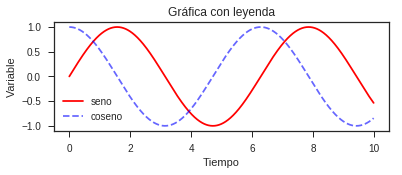

In [0]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda')
plt.legend(loc='best') #con loc se indica dónde se quiere que ponga la leyenda. 'best' para que elija la mejor posición.
plt.show()

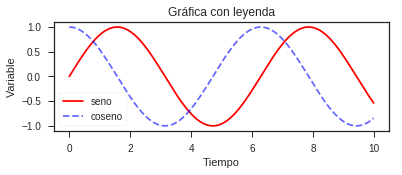

In [0]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda')
plt.legend(loc='best', frameon=True) #frameon pone o quita el rectángulo de la leyenda
plt.show()

En algunos casos, interesa poner la leyenda fuera de los ejes.

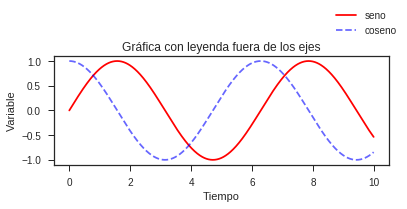

In [0]:
fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con leyenda fuera de los ejes')
plt.legend(fontsize=10, bbox_to_anchor=(1.05,1.5), bbox_transform=ax.transAxes) #ajusta el tamaño de la letra y la posición del cuadro. Aquí por ejemplo lo coloca fuera del gráfico a la derecha
plt.show()

### Manipular el aspecto de los bordes y ejes

Se puede controlar completamente el formato de los ejes y las etiquetas. Fíjate en la figura para ver los elementos que han sido modificados.

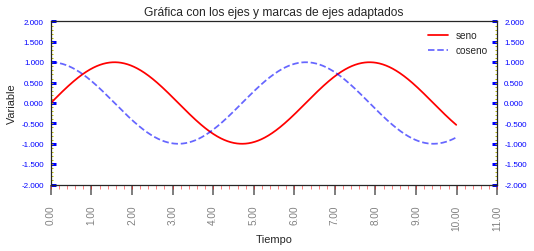

In [0]:
#%% Ajuste de los ticks de ejes
import matplotlib.ticker as ticker #para controlar los ticks de los ejes

fig, ax = plt.subplots(figsize=(8,3))
plt.plot(x, y, 'r-', label='seno')
plt.plot(x, y2, 'b--', alpha=0.6, label='coseno')
start, end = ax.get_xlim()#coge los límites en el eje x

#ajusta el aspecto de los ticks de los ejes
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))#ajusta decimales del eje X
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.0)) #ajusta la frecuencia de los ticks major eje X
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.2)) #ajusta la frecuencia de los ticks minor eje X
ax.tick_params(axis='x', direction='out', length=10, width=2, colors='grey', pad=10, labelrotation=90, labelsize=10) #ajusta parámetros ticks eje X (si no se especifica, se refiere a los major)
ax.tick_params(axis='x', which='minor', length=4, color='r') #ajusta parámetros ticks minor eje X

ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f')) #ajusta decimales del eje Y
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1)) #ajusta la frecuencia de los ticks minor eje Y
ax.tick_params(axis='y', direction='in', length=5, width=3, colors='b', right=True, labelright=True, labelsize=8) #ajusta parámetros ticks major eje Y (si no se especifica, se refiere a los major)
ax.tick_params(axis='y', which='minor', direction='in', length=2, width=1, colors='y', right=True) #ajusta parámetros ticks minor eje X

ax.set_xlim((0, 11)) #fija el tamaño de datos que abarca el eje x
ax.set_ylim((-2, 2)) #fija el tamaño de datos que abarca el eje y

ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Gráfica con los ejes y marcas de ejes adaptados')
plt.legend(loc='best')
plt.show()

También se pueden eliminar partes de los ejes, como las etiquetas o partes del rectángulo de los ejes.

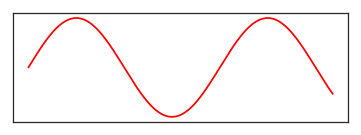

In [0]:
#%% Quitar etiquetas y ticks de los ejes

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-')

ax.tick_params(labelbottom=False, bottom=False, labelleft=False, left=False)#quita etiquetas y ticks
plt.show()

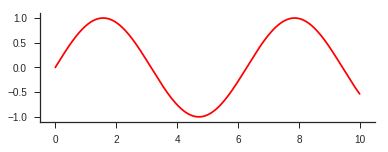

In [0]:
#%% Quitar bordes de la figura

fig, ax = plt.subplots(figsize=(6,2))
plt.plot(x, y, 'r-')


ax.spines['top'].set_visible(False) #quita los bordes de uno en uno
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

plt.show()

### Gráficas con doble eje

En ocasiones necesitamos representar en una misma gráfica más de una variable que tienen escalas muy distintas. Si las representáramos con la misma escala, las que son más pequeñas no se apreciarían.
Para ello podemos crear un nuevo eje en la gráfica y elejir qué variables queremos representar en ese eje.

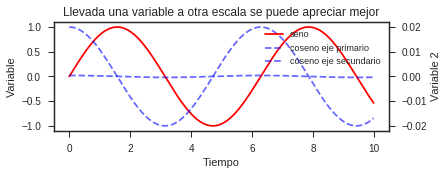

In [0]:
#%% INCLUIR DOBLE EJE
#1- Datos distintos con distinta escala
x2 = np.arange(0,10, 0.01)
y2 = np.sin(x2)
y3= np.cos(x2)/50 #reducimos la escala

#Dibujando con el mismo eje no se aprecia bien la escala más pequeña
fig, ax = plt.subplots(figsize=(6,2))
ax.plot(x2, y2, 'r-', label='seno')
ax.plot(x2, y3, 'b--', alpha=0.6, label='coseno eje primario')#sobre el eje de la izquierda

ax2 = ax.twinx() #crea el segundo eje
ax2.plot(x2, y3, 'b--', alpha=0.6, label='coseno eje secundario')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax2.set_ylabel('Variable 2')
ax.set_title('Llevada una variable a otra escala se puede apreciar mejor')

fig.legend(fontsize=9, bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)#en este caso la leyenda hay que ponerla así para que incluya los dos ejes
plt.show()

También se puede representar la misma gráfica con dos escalas diferentes, una a cada lado. Esto viene bien por ejemplo al presentar una misma magnitud en dos unidades distintas. En el siguiente ejemplo, se muestra la fuerza en unidades de newtons y de veces el peso corporal (Body Weight).

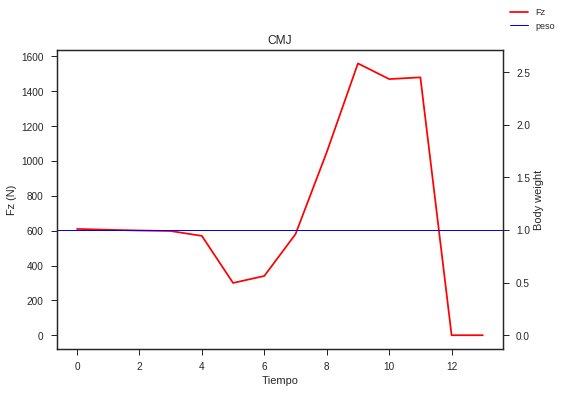

In [0]:
#%% 2- mismos datos con escala diferente
Fz=np.array([610, 605, 601, 598, 570, 300, 340, 580, 1050, 1560, 1470, 1480, 0, 0]) #datos aproximados para simular rápido un salto con contramovimiento
peso=Fz[0:4].mean()

fig, ax = plt.subplots()
ax.plot(Fz, 'r-', label='Fz')
ax.axhline(y=peso, lw=1, color='b', label='peso') #marca la línea del peso

ax.set_xlabel('Tiempo')
ax.set_ylabel('Fz (N)')
ax.set_title('CMJ')

ax2 = ax.twinx() #crea el segundo eje
minY, maxY = ax.get_ylim()#toma el máximo y mínimo de la escala del eje primario (en este caso la fuerza en newtons)
ax2.set_ylim(minY/peso, maxY/peso) #ajusta el máx y mín del eje secundario según la escala de fuerza normalizada
ax2.set_ylabel('Body weight')

fig.legend(fontsize=9)
plt.show()

### Realizar anotaciones de texto en las gráficas

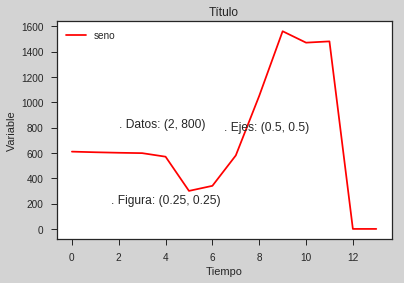

In [0]:
Fz=np.array([610, 605, 601, 598, 570, 300, 340, 580, 1050, 1560, 1470, 1480, 0, 0]) #datos aproximados para simular rápido un salto con contramovimiento
#%% ANOTACIONES DE TEXTO
#%matplotlib inline
#%% Incluir anotaciones de texto sencillas
fig, ax = plt.subplots(figsize=(6,4), facecolor='lightgray') #facecolor cambia el color de los bordes de la figura
plt.plot(Fz, 'r-', label='seno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Título')
plt.legend(loc='best')

# para situar el texto en la figura, se pueden usar coordenadas de los datos de la gráfica, de los ejes o de la figura.
ax.text(2, 800, '. Datos: (2, 800)', transform=ax.transData)
ax.text(0.5, 0.5, '. Ejes: (0.5, 0.5)', transform=ax.transAxes) #proporción al tamaño de los ejes o axes, que es el cuadrado que aquí se ve blanco. (0,0) es la esquina inferior izquierda de la parte blanca. (1,1) es la esquina superior derecha.
ax.text(0.25, 0.25, '. Figura: (0.25, 0.25)', transform=fig.transFigure); #proporción al tamaño de la figura, que es el cuadrado que aquí se ve gris. (0,0) es la esquina inferior izquierda de la parte gris.
            

plt.show()



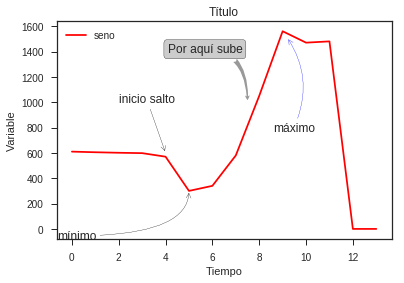

In [0]:
#%% Incluir anotaciones con flechas
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(Fz, 'r-', label='seno')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Variable')
ax.set_title('Título')
plt.legend(loc='best')


ax.annotate('inicio salto',
            xy=(4, 600), xycoords='data',
            xytext=(2, 1000), textcoords='data',
            arrowprops=dict(arrowstyle="->")) #arrowprops indica el estilo de la flecha. Por defecto es recta


ax.annotate('mínimo',
            xy=(5, 300), xycoords='data',
            xytext=(0, 0), textcoords='axes fraction', #en este caso, las coordenadas del texto son relativas al tamaño del cuadro de los ejes (de 0 a 1)
            arrowprops=dict(arrowstyle='->', connectionstyle='angle3,angleA=0,angleB=90')) #con algle3 se puede especificar el ángulo de la flecha al inicio y al final

#Ahora vamos a crear una flecha que apunte automáticamente al valor máximo sin necesidad de buscarlo a mano
Fzmax = np.max(Fz)
indiceFzmax = np.where(Fz==Fzmax)[0] #esto busca la posición del máximo en el array 
ax.annotate('máximo',
            xy=(indiceFzmax, Fzmax), xycoords='data', #pasa directamente la posición y el valor de fuerza que habíamos buscado
            xytext=(-10, -100), textcoords='offset points', #ahora coloca el texto a una distancia respecto a la punta de la flecha
            arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=0.3', #con arc3 genera una curva con el radio que se indique
            shrinkB=10)) #margen de la punta de la flecha respecto al objetivo. Si no se pone una distancia, se confunde la punta de la flecha con los datos

#También se pueden crear anotaciones de fantasía
ax.annotate('Por aquí sube', xy=(7.5, 1000),  xycoords='data',
            xytext=(-80, 50), textcoords='offset points',
            bbox=dict(boxstyle="round", fc='0.8'), #configura el aspecto del recuadro del texto
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()

Se pueden encontrar más características de configuración de flechas en la [página de Matplotlib](https://matplotlib.org/users/annotations.html)

### Destacar áreas en las gráficas

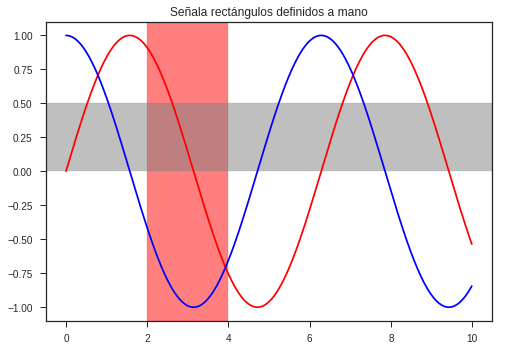

In [0]:
#%% DESTACAR ÁREAS
x = np.arange(0,10, 0.01)
y = np.sin(x)
y2= np.cos(x)


#Rectángulos en zonas concretas
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

ax.axvspan(2, 4, alpha=0.5, color='r') #crea un rectángulo vertical delimitado a mano
ax.axhspan(0, 0.5, alpha=0.5, color='gray') #crea un rectángulo horizontal delimitado a mano
plt.title('Señala rectángulos definidos a mano')
plt.show()


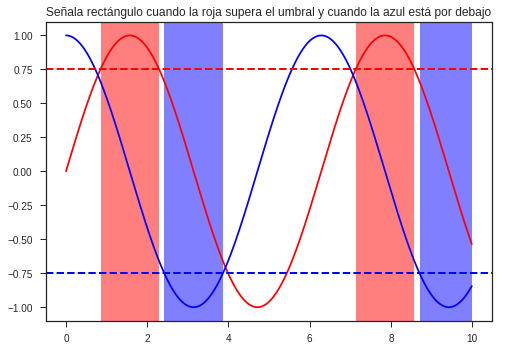

In [0]:
#Rectángulos dependientes con condicional de la variable
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

umbral=0.75
ax.axhline(umbral, color='r', linestyle='--', lw=2)
ax.axhline(-umbral, color='b', linestyle='--', lw=2)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes) #controla la referencia de las medidas de los ejes (transData en coordenadas de las variables, transAxes en coordenadas de los ejes (entre 0 y 1))
ax.fill_between(x, 0, 1, where=y > umbral, facecolor='r', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y2 < -umbral, facecolor='b', alpha=0.5, transform=trans)
plt.title('Señala rectángulo cuando la roja supera el umbral y cuando la azul está por debajo')
plt.show()

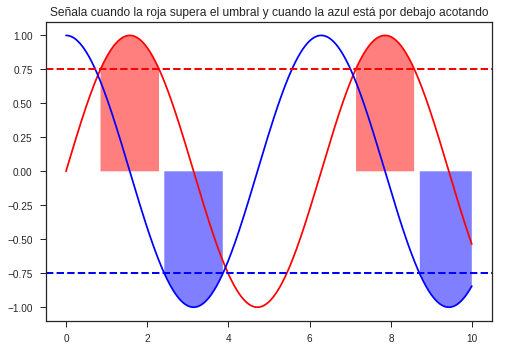

In [0]:
#Como el anterior pero en lugar de un rectángulo, marca el área entre cero y la variable
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

umbral=0.75
ax.axhline(umbral, color='r', linestyle='--', lw=2)
ax.axhline(-umbral, color='b', linestyle='--', lw=2)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transData)
ax.fill_between(x, 0, y, where=y > umbral, facecolor='r', alpha=0.5, transform=trans)
ax.fill_between(x, y2, 0, where=y2 < -umbral, facecolor='b', alpha=0.5, transform=trans)
plt.title('Señala cuando la roja supera el umbral y cuando la azul está por debajo acotando')
plt.show()


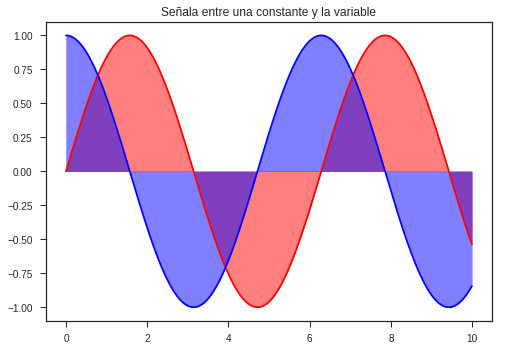

In [0]:
#Áreas de las gráficas, entre constante y gráfica
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

ax.fill_between(x, 0, y, color='r', alpha=0.5) #entre el cero y variable y
ax.fill_between(x, 0, y2, color='b', alpha=0.5) #entre el cero y variable y
plt.title('Señala entre una constante y la variable')
plt.show()


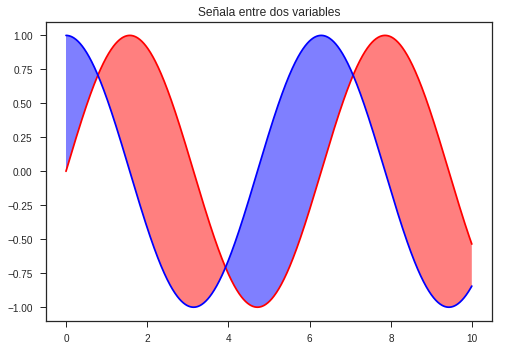

In [0]:
#Áreas de las gráficas, entre dos gráficas
fig, ax = plt.subplots()
plt.plot(x, y, 'r')
plt.plot(x, y2, 'b')

ax.fill_between(x, y, y2, where=y2 >= y, facecolor='b', alpha=0.5, interpolate=True)
ax.fill_between(x, y, y2, where=y2 <= y, facecolor='r', alpha=0.5, interpolate=True)
plt.title('Señala entre dos variables')
plt.show()


### Crear varias gráficas dentro de la misma figura (subplots)

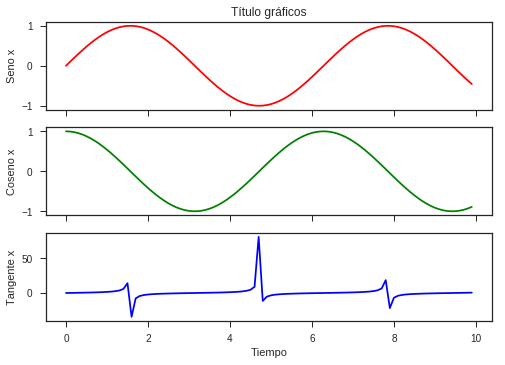

In [0]:
#%% CREAR VARIOS SUBPLOTS EN UNA MISMA FIGURA
x4 = np.arange(0, 10, 0.1)
y41 = np.sin(x4)
y42 = np.cos(x4)
y43 = np.tan(x4)


fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0].plot(x4, y41, 'r')
ax[1].plot(x4, y42, 'g')
ax[2].plot(x4, y43, 'b')

ax[0].set_ylabel('Seno x')
ax[1].set_ylabel('Coseno x')
ax[2].set_ylabel('Tangente x')


ax[2].set_xlabel('Tiempo')

ax[0].set_title('Título gráficos')

plt.show()


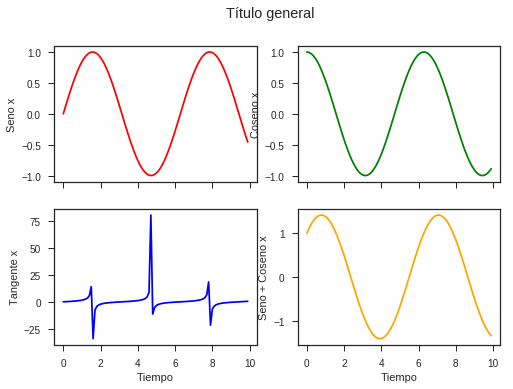

In [0]:
#%% CREAR VARIOS SUBPLOTS EN UNA MISMA FIGURA
x4 = np.arange(0, 10, 0.1)
y41 = np.sin(x4)
y42 = np.cos(x4)
y43 = np.tan(x4)


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
#
ax[1,0].set_xlabel('Tiempo')
ax[1,1].set_xlabel('Tiempo')
#
#ax[0].set_title('Título gráficos')

plt.suptitle('Título general')#título de toda la figura

plt.show()

Fíjate en que los títulos de eje se solapan con las gráficas que quedan a los lados. Para evitarlo, se pone la instrucción plt.tight_layout() para que ajuste automáticamente los espacios.

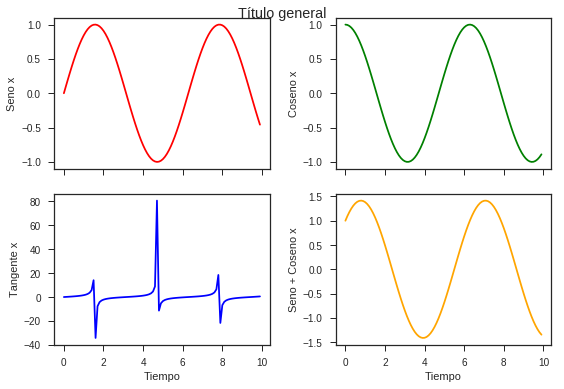

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
#
ax[1,0].set_xlabel('Tiempo')
ax[1,1].set_xlabel('Tiempo')
#
#ax[0].set_title('Título gráficos')

plt.suptitle('Título general')#título de toda la figura
plt.tight_layout() #ajusta automáticamente los espacios entre gráficas
plt.show()

Como ahora ha puesto el título general muy pegado a las gráficas, podemos cambiar el tamaño del área de los ejes para alejarlo lo que queramos con la misma instrucción plt.tight_layout() modificada.

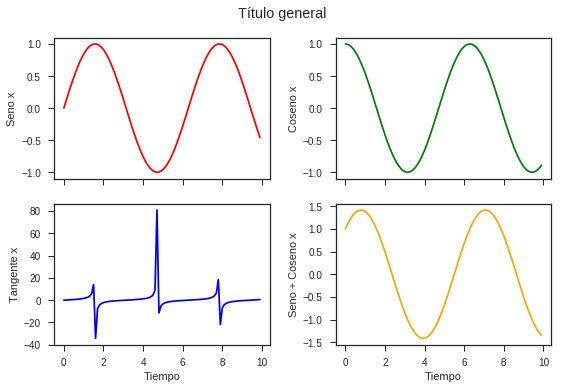

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
#
ax[1,0].set_xlabel('Tiempo')
ax[1,1].set_xlabel('Tiempo')
#
#ax[0].set_title('Título gráficos')

plt.suptitle('Título general')#título de toda la figura

plt.tight_layout(rect=[0, 0, 1, 0.95])#rect permite ajustar el tamaño de la zona de las gráficas.
                                      # los 4 números corresponden a: x izquierda, y abajo, x derecha, y arriba
                                      #En este caso se dice que ocupe todo el espacio pero la parte superior se quede un poco por debajo para dejar espacio al título general.
plt.show()

#### Ajuste de la proporción de tamaño de cada subplot

Se puede modificar el ratio del tamaño de las gráficas, en ancho...

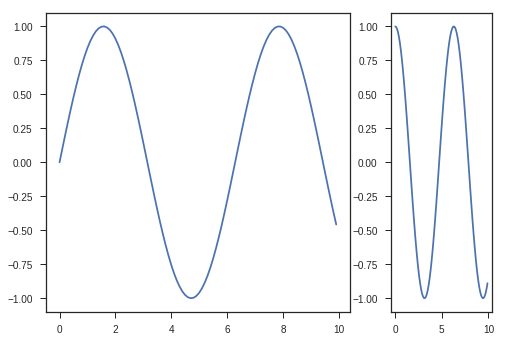

In [0]:
fig, ax = plt.subplots(1,2, gridspec_kw = {'width_ratios':[3, 1]}) #crea 2 subplots, el de la izquierda tres veces más ancho
ax[0].plot(x4, y41)
ax[1].plot(x4, y42)
plt.show()

...y en alto...

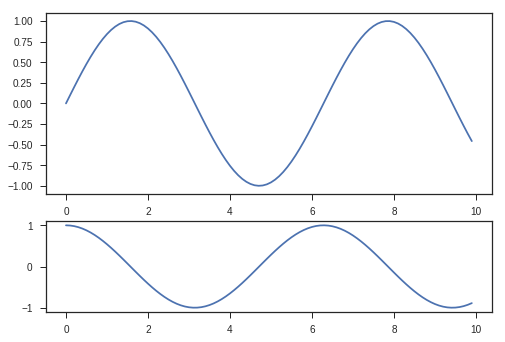

In [0]:
fig, ax = plt.subplots(2,1, gridspec_kw = {'height_ratios':[2, 1]}) #crea 2 subplots, el de la arriba dos veces más alto
ax[0].plot(x4, y41)
ax[1].plot(x4, y42)
plt.show()

...y los dos a la vez

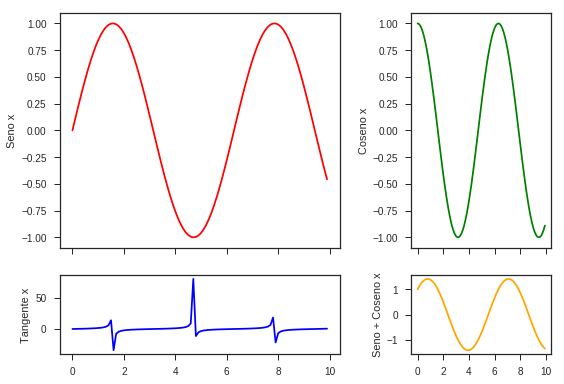

In [0]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, gridspec_kw = {'height_ratios':[3, 1], 'width_ratios':[2, 1]})#se puede simplificar como plt.subplots(1, 2)
ax[0,0].plot(x4, y41, 'r')
ax[0,1].plot(x4, y42, 'g')
ax[1,0].plot(x4, y43, 'b')
ax[1,1].plot(x4, y41+y42, 'orange')

ax[0,0].set_ylabel('Seno x')
ax[0,1].set_ylabel('Coseno x')
ax[1,0].set_ylabel('Tangente x')
ax[1,1].set_ylabel('Seno + Coseno x')
plt.tight_layout()
plt.show()

## Gráficas de patrón promedio (ensemble average)

Normalmente utilizaríamos datos conla evolución de alguna variable durante un tiempo. En este caso crearemos unos datos ficticios basados en ondas sinusoidales que simulen 10 repeticiones de un movimiento con cierta variabilidad.

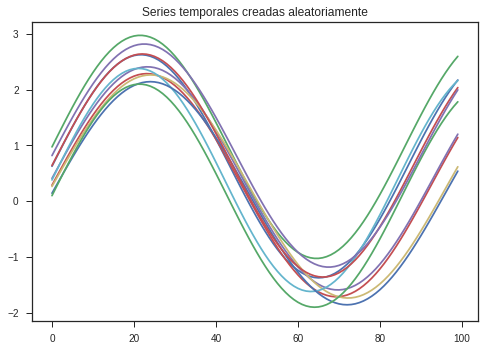

In [10]:
np.random.seed(1203) # para mantener la consistencia al crear los datos aleatorios

t = np.arange(0, 1.0, 1.0/100) #columna de tiempo, un segundo a 100 Hz

#Crea las condiciones de las ondas sinusoidales
numSerires=10
rango_of=[0,1]
rango_f=[1, 1.2]

of=np.random.rand(numSerires)*(rango_of[1]-rango_of[0])+rango_of[0]
a=2 #amplitud
f=np.random.rand(numSerires)*(rango_f[1]-rango_f[0])+rango_f[0]

DatosGraf = pd.DataFrame(np.array([of[i] + a*np.sin(2*np.pi*f[i]*t) for i in range(numSerires)]).T)

#Dibuja la gráfica para ver qué datos ha creado
fig, ax = plt.subplots()
plt.plot(DatosGraf)
plt.title('Series temporales creadas aleatoriamente')
plt.show()

Una vez tenemos los datos, creamos el gráfico con las medias y desviación típica instante a instante.

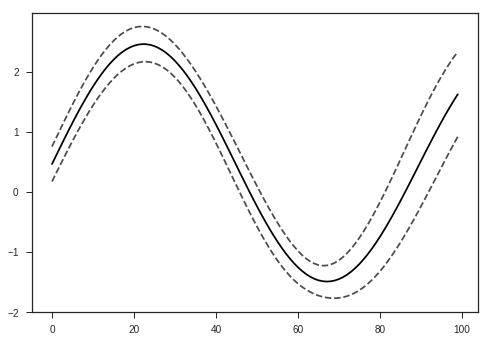

In [11]:

#Calcula la curva promedio de los dos conjuntos de datos punto por punto
curvProm=DatosGraf.mean(axis=1)

#Calcula la curva SD de los dos conjuntos de datos punto por punto
curvSD=DatosGraf.std(axis=1)

fig, ax = plt.subplots()
plt.plot(curvProm, 'k') #dibuja la línea central del promedio
plt.plot(curvProm-curvSD, 'k--', alpha=0.7)
plt.plot(curvProm+curvSD, 'k--', alpha=0.7)
plt.title('Media y desviación títpica punto por punto con líneas')
plt.show()

Para comprobar cuánto abarcan las líneas de las desviaciones típicas, dibujamos las líneas de los datos originales y encima las de la media y desviaciones típicas.

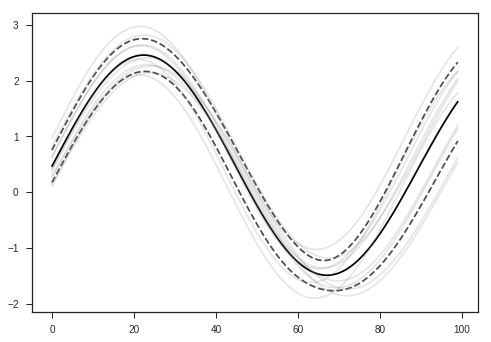

In [12]:
fig, ax = plt.subplots()
plt.plot(curvProm, 'k') #dibuja la línea central del promedio
plt.plot(curvProm-curvSD, 'k--', alpha=0.7)
plt.plot(curvProm+curvSD, 'k--', alpha=0.7)
plt.plot(DatosGraf, 'grey', alpha=0.2)
plt.show()

Ahora representamos el mismo tipo de gráfico pero con la zona de las desviaciones típicas sonbreadas.

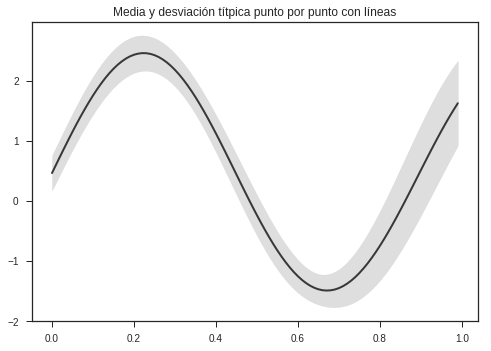

In [16]:
fig, ax = plt.subplots()
ax.plot(t, curvProm, 'k-', linewidth=2.0, alpha=0.75)
ax.fill_between(t, curvProm-curvSD, curvProm+curvSD, color='0.75', facecolor='0.25', alpha=0.5)

plt.title('Media y desviación títpica punto por punto con sombras')
plt.show()

## Gráficas de puntos

Los mismos gráficos que hacíamos anteriomente, podemos hacerlos eliminando las líneas de unión entre datos y dejando los marcadores.

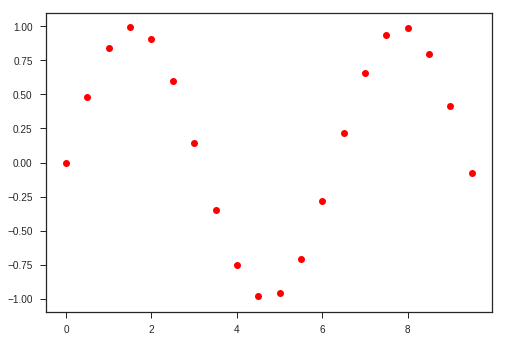

In [0]:
# %%GRÁFICAS DE PUNTOS

xx = np.arange(0,10, 0.5)
yy = np.sin(xx)
yy2= np.cos(xx)

plt.plot(xx, yy, 'ro')
plt.plot(xx, yy2, 'b+', markersize=20) #markersize o ms
plt.show()

Si presentamos cada variable en un eje, tenemos un gráfico de tipo scatter plot.

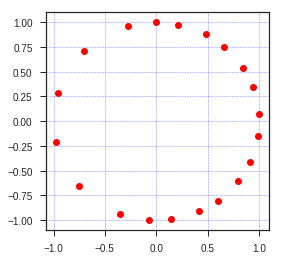

In [0]:
#%% SCATTER PLOT de una variable contra otra
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(yy, yy2, 'ro')
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)# linestyle o ls; linewidth o lw
plt.show()

También se pueden hacer directamente gráficos del tipo scatter plot. Por ejemplo aquí, cada dato tiene un color y un tamaño específico.

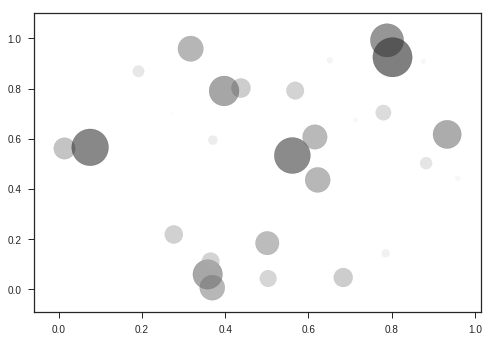

In [0]:
np.random.seed(1234) #fija el factor random para reproducibilidad

N = 30
x = np.random.rand(N)
y = np.random.rand(N)
z = np.random.rand(N)
area = (40 * z)**2  # radio de 0 a 20 en función del tamaño de la variable z

plt.scatter(x, y, marker='o', s=area, c=z, alpha=0.5)
plt.show()

También se pueden hacer gráficos scatter radiales .

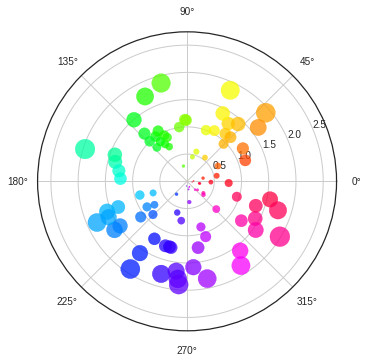

In [0]:
np.random.seed(1234)

N = 100
r = 2 * np.random.rand(N) #el radio varía entre 0 y 2
theta = 2 * np.pi * np.random.rand(N) #el ángulo varía entre 0 y 360º
area = 100 * r**2 #el área de los marcadores aumenta con el radio
colors = theta #el color varíacon el ángulo

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75) #cmap='hsv' sirve para elegir un tipo de paleta de colores específico
plt.show()

##Gráficas de barras

Hay un comando específico para hacer gráficas de barras desde matplotlib.

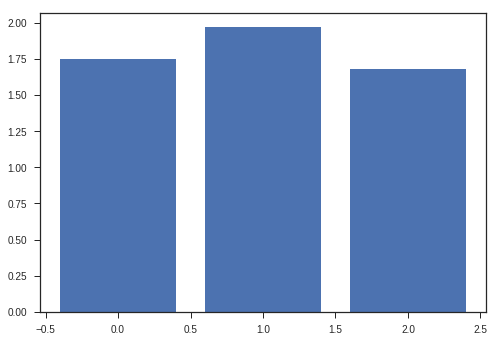

In [0]:
#datos inventados de medias de grupos
condicion = np.arange(3)
variable = [1.75, 1.97, 1.68]


fig, ax = plt.subplots()
plt.bar(condicion,variable)

plt.show()

En casos como este, normalmente se incluye un texto debajo de cada barra, en lugar de un número.

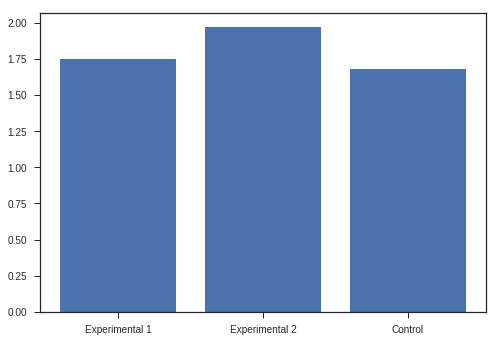

In [0]:
nomCondiciones=['Experimental 1', 'Experimental 2', 'Control']
fig, ax = plt.subplots()
plt.bar(condicion,variable, tick_label=nomCondiciones)

plt.show()

Por supuesto, se pueden controlar todas las características de los elementos de la figura. En la siguiente se pueden ver varios ejemplos.

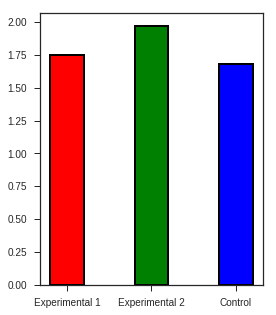

In [0]:
nomCondiciones=['Experimental 1', 'Experimental 2', 'Control']
fig, ax = plt.subplots(figsize=(4,5))
plt.bar(condicion,variable, width=0.4, color=['r', 'g', 'b'], edgecolor='black', linewidth=2, tick_label=nomCondiciones)

plt.show()

En el siguiente ejemplo se puede ver una gráfica completa lista para publicación, con dos conjuntos de datos, con barras de error, etc.

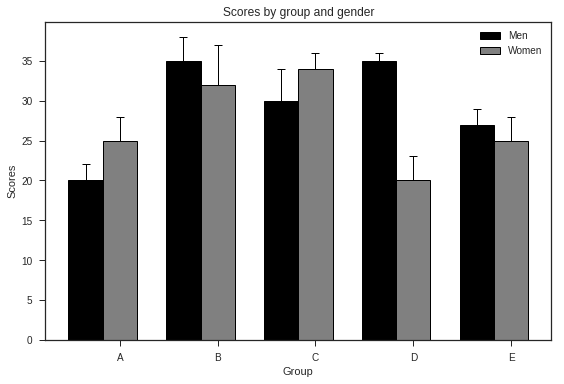

In [17]:
n_groups = 5
index = np.arange(n_groups)

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)


fig, ax = plt.subplots()
bar_width = 0.35
opacity = 1

error_config=dict(elinewidth=1, barsabove='true', ecolor='black', capsize=4, capthick=1, alpha=opacity)

plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='0.0',
                 edgecolor='black',
                 yerr=np.vstack([[0]*len(std_men), std_men]),
                 error_kw=error_config,
                 label='Men',
                 linewidth=1)

plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='0.5',
                 edgecolor='black',
                 yerr=np.vstack([[0]*len(std_women), std_women]),
                 error_kw=error_config,
                 label='Women',
                 linewidth=1)


plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend(loc='best')


plt.tight_layout()

plt.show()

##Gráficas con Pandas directamente

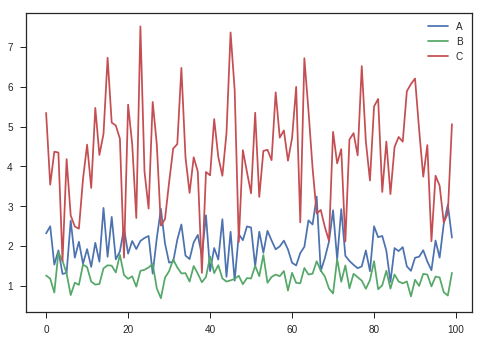

In [0]:
import pandas as pd

#Ejemplo de muestra aleatoria
means=[2.0, 1.2, 4.2]
sigmas=[0.5, 0.3, 1.2]
sx = np.random.normal(means, sigmas, [100, len(means)])
df=pd.DataFrame(sx, columns=['A','B','C']) #pasa el numpy a dataframe de pandas

df.plot()#por defecto gráfico de líneas

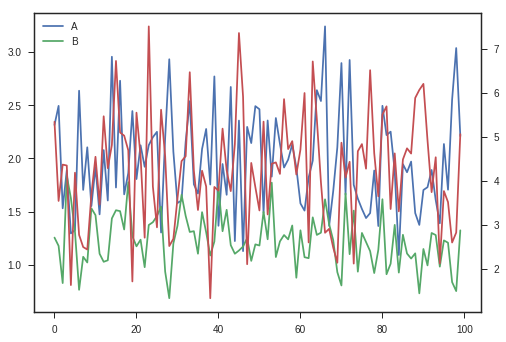

In [0]:
#ponemos una variable en el eje secundario
df[['A','B']].plot()
df['C'].plot(secondary_y=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb459947b00>],
      dtype=object)

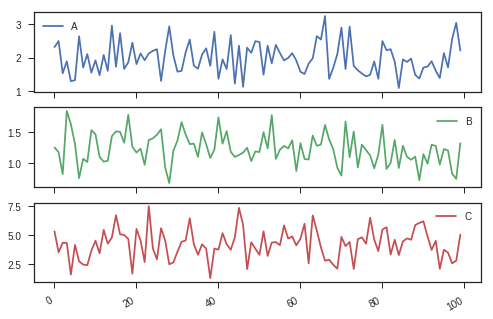

In [0]:
#separa cada variable en un subplot, se puede indicar el nº de filas y columnas
df.plot(subplots=True, layout=(3, 1))

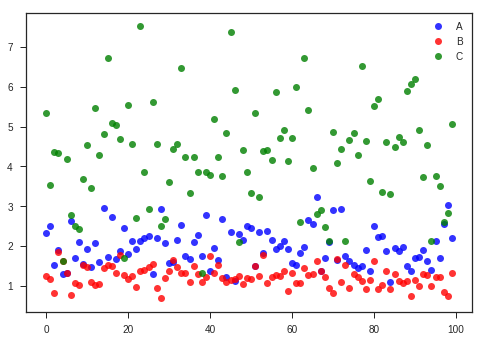

In [0]:
#Gráfico de puntos
df.plot(style=['bo', 'ro', 'go'], alpha=0.8)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


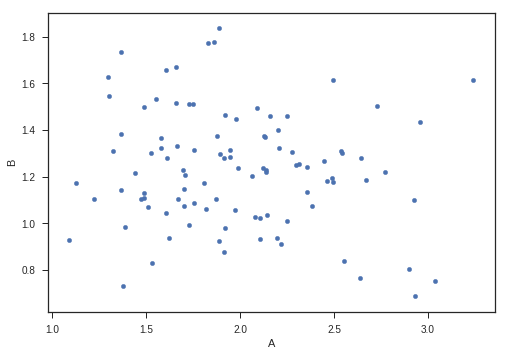

In [0]:
#Scatter plot
df.plot(x='A',y='B', kind='scatter')

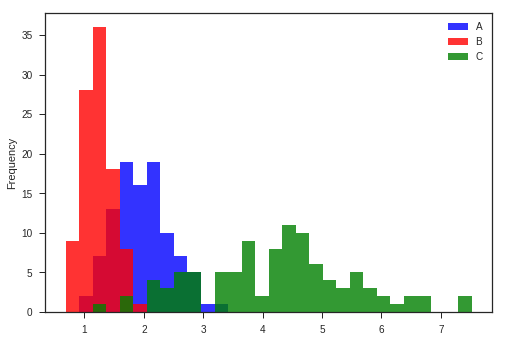

In [0]:
#Histogramas
df.plot.hist(bins=30, color=['b','r', 'g'], alpha=0.8)#crea un histograma

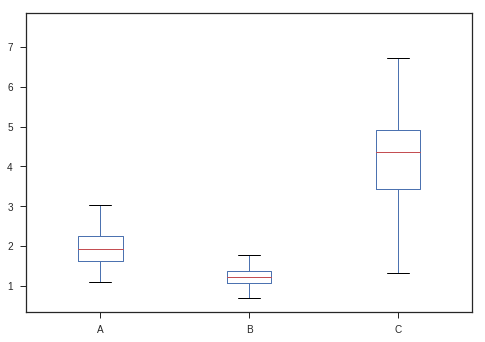

In [0]:
#Diagrama de cajas
df.plot.box()


Otras opciones de gráficos son:
df.plot.area     df.plot.barh     df.plot.density  df.plot.hist     df.plot.line     df.plot.scatter
df.plot.bar      df.plot.box      df.plot.hexbin   df.plot.kde      df.plot.pie

### Gráficas de barras

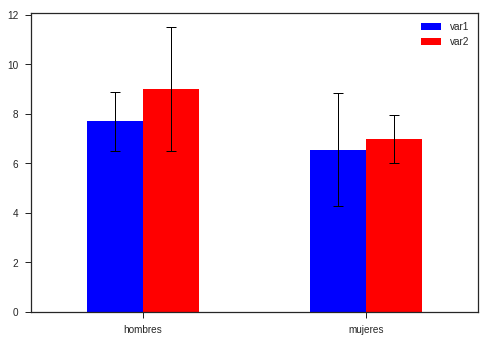

In [0]:
dfmedias = pd.DataFrame([[7.70, 9.01],[6.56, 6.99]], columns=['var1', 'var2'], index=['hombres', 'mujeres'])
dfSD = pd.DataFrame([[1.2, 2.3],[2.5, 0.98]], columns=['var1', 'var2'], index=['hombres', 'mujeres'])

error_config=dict(ecolor='k', lw=1, capsize=5, capthick=1)

dfmedias.plot.bar(yerr=dfSD.values, error_kw=error_config, color=['b', 'r'], rot=0)

### ALGUNOS TIPOS DE GRÁFICOS SOFISTICADOS CON PANDAS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


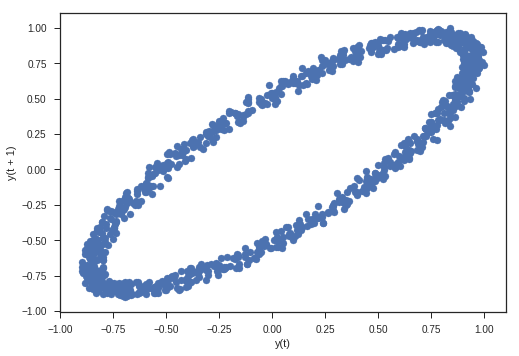

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


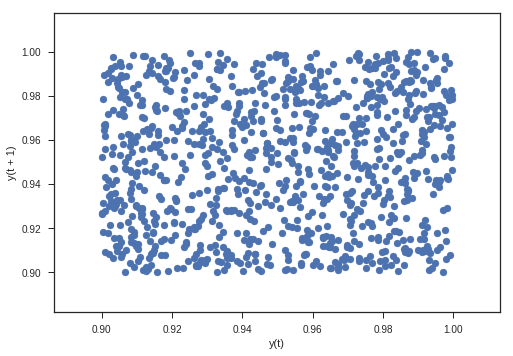

In [0]:
#Lag Plot
#Para comprobar si los datos son aleatorios.

from pandas.plotting import lag_plot


data1 = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))
lag_plot(data1) #señal no aleatoria
plt.show()

data2 = pd.Series(0.1 * np.random.rand(1000) + 0.9 )
lag_plot(data2) #señal aleatoria
plt.show()

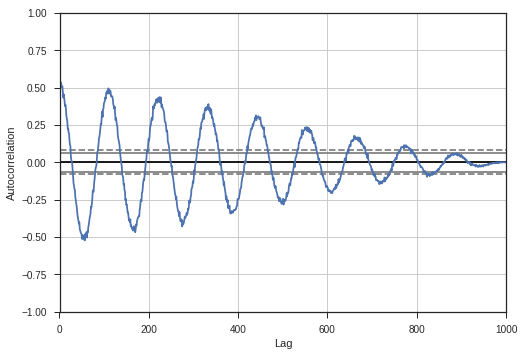

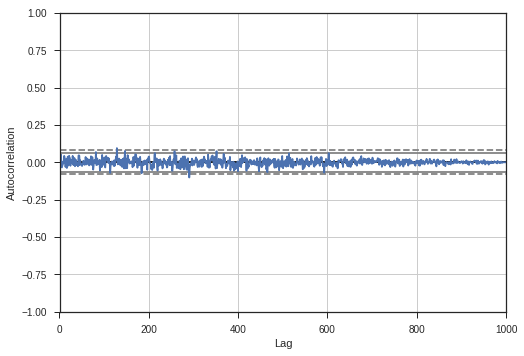

In [0]:
#Autocorrelation Plot
"""
Autocorrelation plots are often used for checking randomness in time series. 
This is done by computing autocorrelations for data values at varying time lags. 
If time series is random, such autocorrelations should be near zero for any and 
all time-lag separations. If time series is non-random then one or more of the 
autocorrelations will be significantly non-zero. The horizontal lines displayed 
in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% 
confidence band.
"""
from pandas.plotting import autocorrelation_plot
data3 = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))

autocorrelation_plot(data3) #señal no aleatoria
plt.show()

autocorrelation_plot(data2) #señal aleatoria
plt.show()

## GUARDAR LAS GRÁFICAS EN ARCHIVOS DE IMAGEN Y EN PDF

### Archivos de imagen

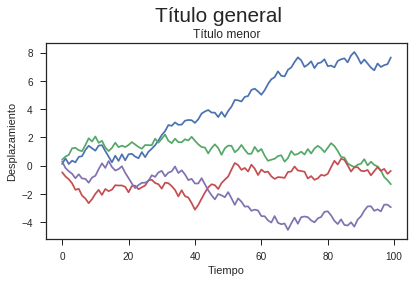

In [18]:
unidadDisco = 'C:'
carpetaOriginal = '\Temp' 

caminos = (np.random.random([100, 4])-0.5).cumsum(axis=0)

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(caminos)

ax.set_ylabel('Desplazamiento')
ax.set_xlabel('Tiempo')
ax.set_title('Título menor')
plt.suptitle('Título general', x=0.52, horizontalalignment='center', fontsize='xx-large')#título de toda la figura, ajusta su posición
plt.tight_layout(rect=[0, 0, 1, 0.95]) #rect permite ajustar el tamaño de la zona de las gráficas.

fig.savefig(unidadDisco+carpetaOriginal+'\Grafica.png', dpi=200) #guarda la gráfica en un archivo de imagen (png, jpg, bmp, etc.)
plt.show()



### Archivos pdf

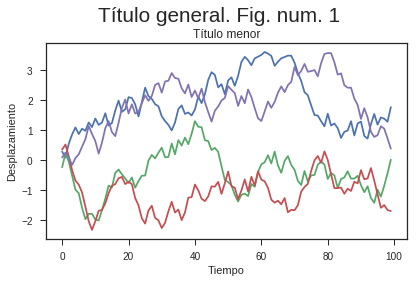

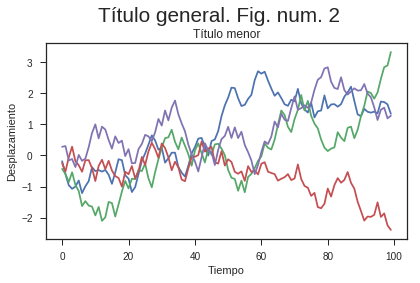

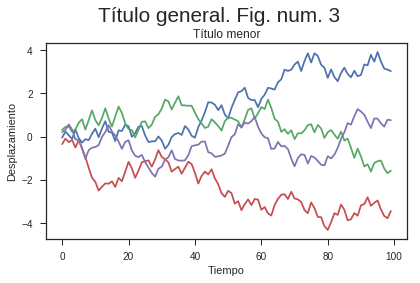

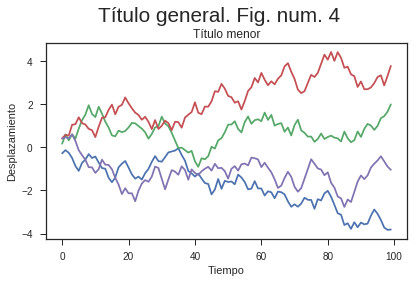

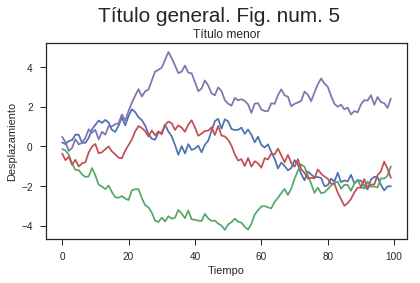

In [20]:
#hacemos la misma figura de antes repetida varias veces
from matplotlib.backends.backend_pdf import PdfPages #para guardar gráficas en pdf

unidadDisco = 'C:'
carpetaOriginal = '\Temp'

#antes de hacer las gráficas, se crea el archivo pdf
pdf_pages = PdfPages(unidadDisco+carpetaOriginal+r'\Graficas.pdf')

for i in range(5): #crea 5 gráficas y las guarda en un mismo pdf
    caminos = (np.random.random([100, 4])-0.5).cumsum(axis=0)
    
    fig, ax = plt.subplots(figsize=(6,4))#controlando el tamaño y la resolución
    plt.plot(caminos)
    
    ax.set_ylabel('Desplazamiento')
    ax.set_xlabel('Tiempo')
    ax.set_title('Título menor')
    plt.suptitle('Título general. Fig. num. {0}'.format(i+1), x=0.52, horizontalalignment='center', fontsize='xx-large')#título de toda la figura, ajusta su posición
    plt.tight_layout(rect=[0, 0, 1, 0.95])#rect permite ajustar el tamaño de la zona de las gráficas.
    
    pdf_pages.savefig(fig)#con esto almacena la figura creada en una página del pdf
    plt.show()

#cuando ya están todas las gráficas hechas, se guarda y cierra el archivo pdf
pdf_pages.close()